# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 10, is characterized by a different temperature or a limited set of temperatures (if you need more than 10 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

## Parallel GA - Soluzione Proposta

Il codice genetico implementatato e' lo stesso dell'esercitazione 9, si riporta pertanto solo una breve descrizione della parallelizzazione.

### Parallelizzazione

In entrambe le versioni sono stati usati 8 nodi, i quali utilizzano 8 generatori di numeri pseudocasuali distinti e pertanto indipendenti, nei file di output di ciascuno nodo sono riportati gli andamenti . Al termine della ricerca gli 8 migliori individui sono stati raccolti attraverso la funzione **Gather()** e riordinati in modo da ottenere l'individuo migliori tra tutti

### Migrazioni

Ogni $N=n_{steps}\ti0.20$ viene effettuato uno scambio tra i nodi degli individui migliori, nel seguente modo:

Viene estratto un numero j tra  (1,size) tramite un generatore condiviso tra i nodi, ogni nodo inviera' tramite la funzione **Sendrecev()** il propro miglior individuo al nodo in posizione rank+j



## Soluzionei trovate

Sono presentate di seguito le migliori soluzioni trovate con e senza e migrazioni: si noti come nel caso delle migrazioni si sia trovata una soluzione leggermente migliore.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


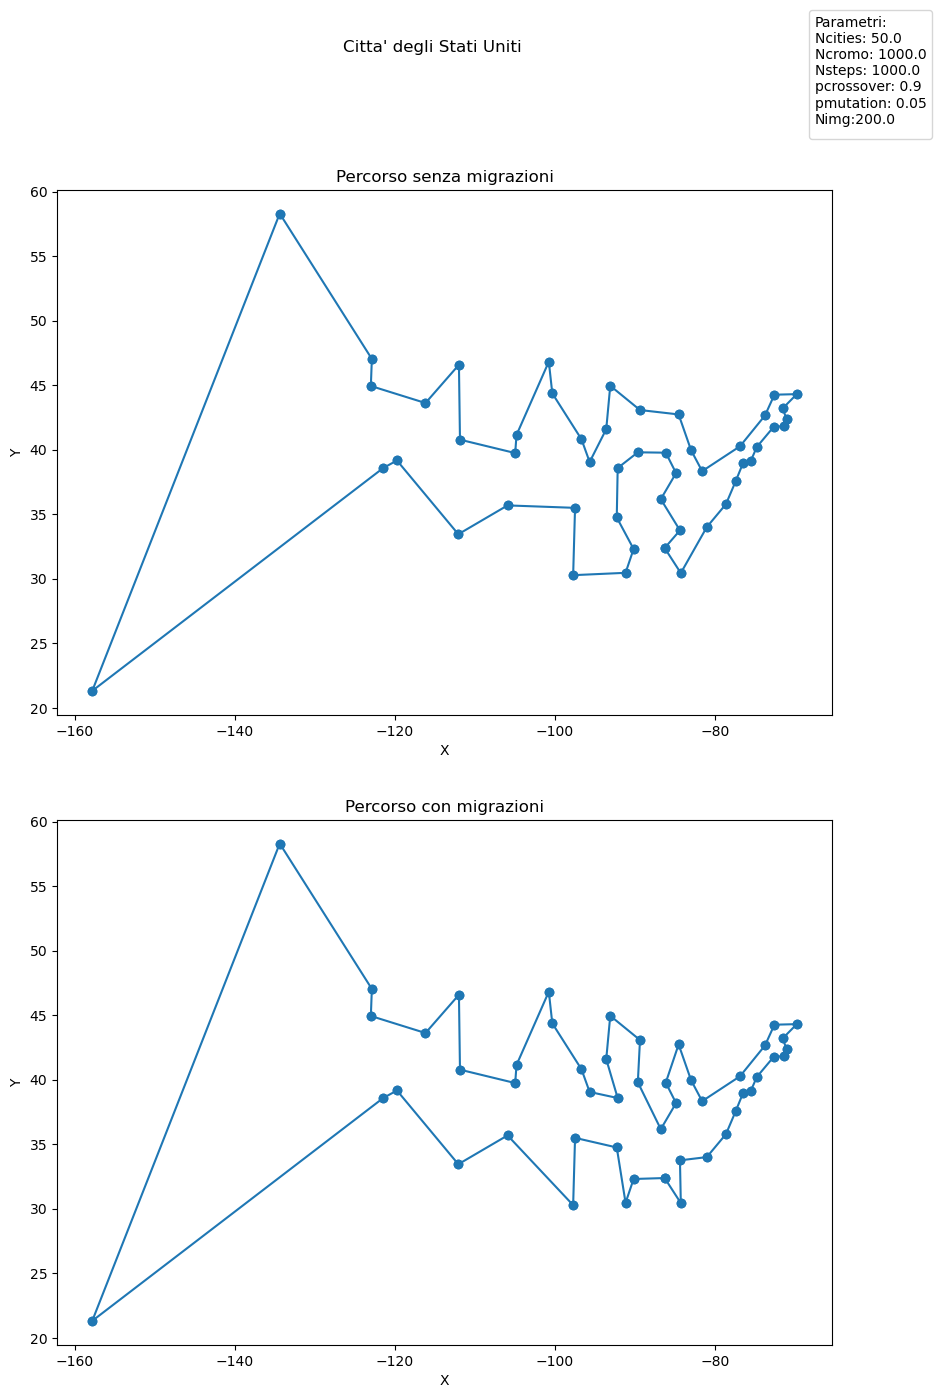

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Coordinate della mappa circolare
map_data = np.loadtxt("./American_capitals.dat")
x = map_data[:, 0]
y = map_data[:, 1]

# Dati di input
input_data = np.loadtxt("./input.data")
Ncities, Ncromo, Nsteps, pcrossover, pmutation,Nmig = input_data

# Creazione del grafico con due sottoplot in verticale
fig, axs = plt.subplots(2, 1, figsize=(10, 15))
fig.suptitle("Citta' degli Stati Uniti")

# Stringa con i dati di input per la legenda
legend_label_input = f'Parametri:\nNcities: {Ncities}\nNcromo: {Ncromo}\nNsteps: {Nsteps}\npcrossover: {pcrossover}\npmutation: {pmutation}\nNimg:{Nmig}'

# Iterazione su entrambi i sottoplot
for i, migration_file in enumerate(["./best.data", "./bestmigration.data"]):
    # Dati degli indici migliori
    best = np.loadtxt(migration_file)
    indices = [int(index) for index in best]

    # Creazione di coppie di punti collegati in base all'ordine degli indici
    connected_points = [(x[i], y[i]) for i in indices]
    connected_points.append((x[indices[0]], y[indices[0]]))

    # Traccia del percorso e scatter plot
    axs[i].plot(*zip(*connected_points), '-o')
    axs[i].scatter(x, y)

    # Impostazione delle etichette degli assi e del titolo
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].set_title(f'Percorso {"senza" if i == 0 else "con"} migrazioni')

# Aggiungi la legenda unica con i dati di input
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0., title=legend_label_input)

# Mostra il grafico
plt.show()


## Andamento delle lunghezze

### Confronto tra i nodi

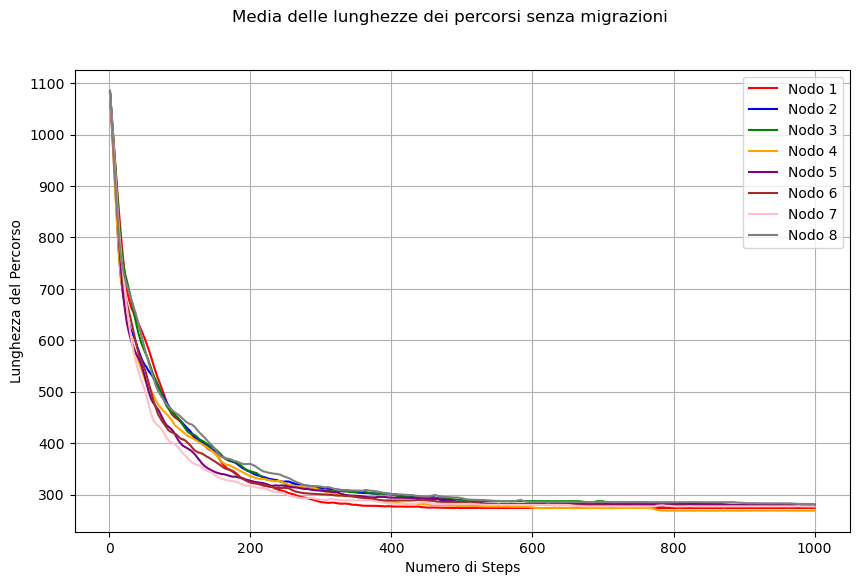

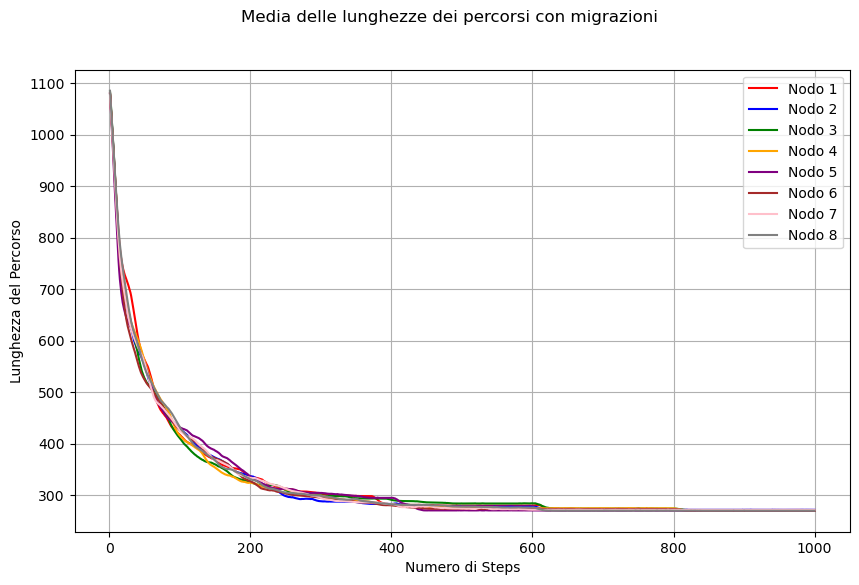

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Creazione delle due figure
fig_nomigr, axs_nomigr = plt.subplots(figsize=(10, 6))
fig_nomigr.suptitle("Media delle lunghezze dei percorsi senza migrazioni")

fig_migr, axs_migr = plt.subplots(figsize=(10, 6))
fig_migr.suptitle("Media delle lunghezze dei percorsi con migrazioni")

# Colori per i plot dei nodi
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

# Iterazione su tutti i nodi
for node in range(8):
    # File con i dati delle lunghezze dei percorsi del nodo corrente
    lengths_file_nomigr = f"./bestlength_{node}.data"
    lengths_file_migr = f"./bestlengthmigration_{node}.data"

    # Dati delle lunghezze dei percorsi
    lengths_nomigr = np.loadtxt(lengths_file_nomigr)
    averages_nomigr = np.mean(lengths_nomigr, axis=1)

    lengths_migr = np.loadtxt(lengths_file_migr)
    averages_migr = np.mean(lengths_migr, axis=1)

    # Traccia delle lunghezze dei percorsi nella figura senza migrazioni
    axs_nomigr.plot(range(1, len(averages_nomigr) + 1), averages_nomigr, color=colors[node], label=f'Nodo {node+1}')

    # Traccia delle lunghezze dei percorsi nella figura con migrazioni
    axs_migr.plot(range(1, len(averages_migr) + 1), averages_migr, color=colors[node], label=f'Nodo {node+1}')

# Impostazione delle etichette degli assi e delle legende
axs_nomigr.set_xlabel('Numero di Steps')
axs_nomigr.set_ylabel('Lunghezza del Percorso')
axs_nomigr.legend()

axs_migr.set_xlabel('Numero di Steps')
axs_migr.set_ylabel('Lunghezza del Percorso')
axs_migr.legend()

axs_migr.grid()
axs_nomigr.grid()
# Mostra le figure
plt.show()


Da questo confronto possiamo notare come nel caso delle migrazioni, la differenza tra i nodi sia minore, questo vuol dire che grazie alle migrazioni l'eredita' del cromosoma migliora si e' diffusa all'interno dei diversi continenti.

## Confronto metodi nel singolo nodo

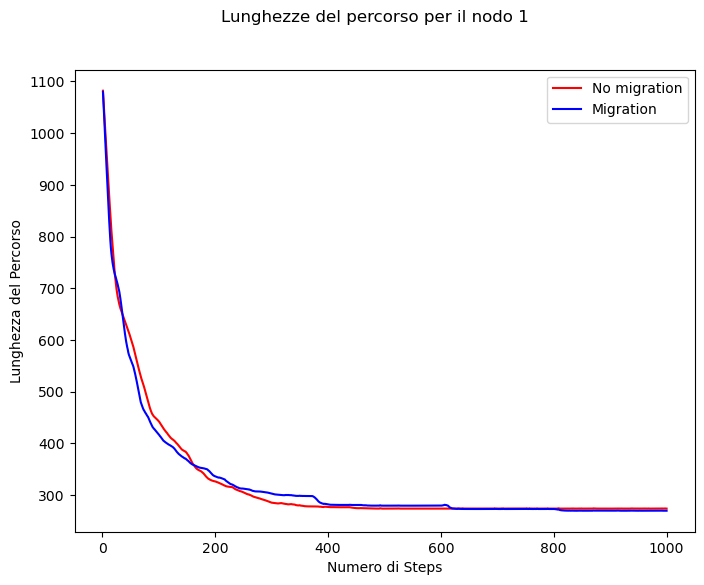

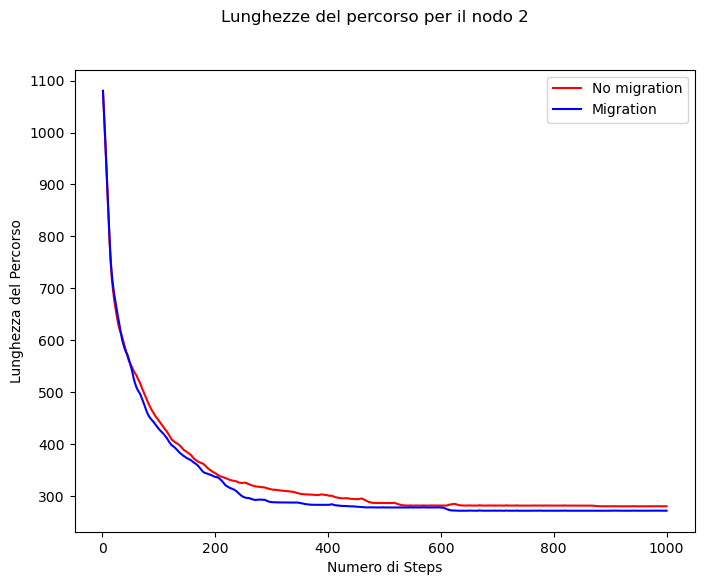

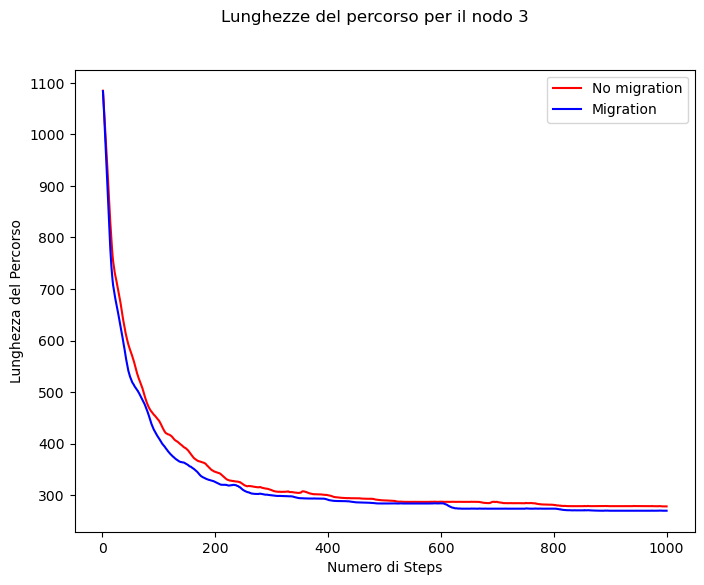

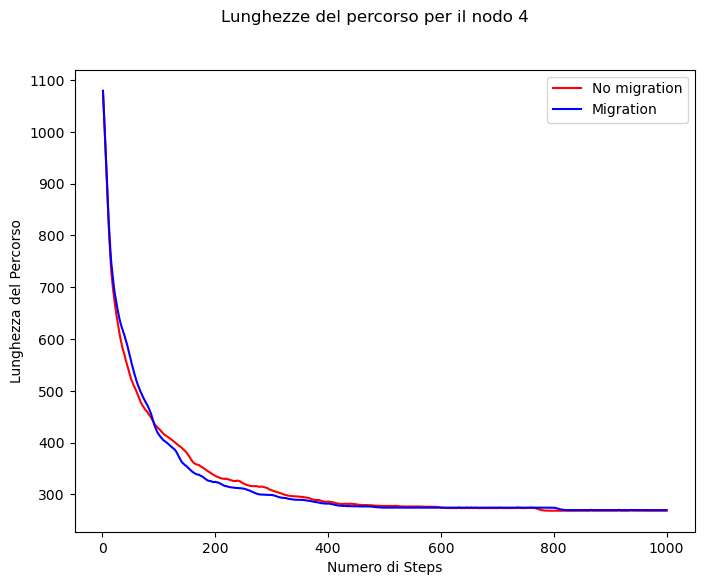

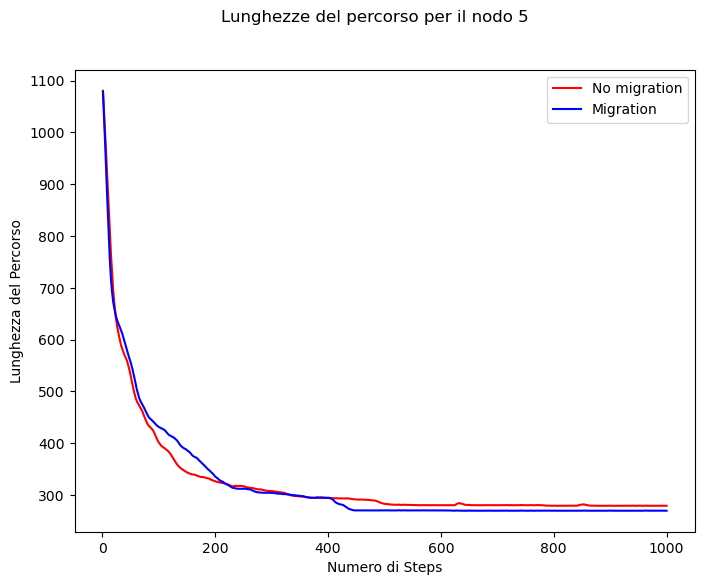

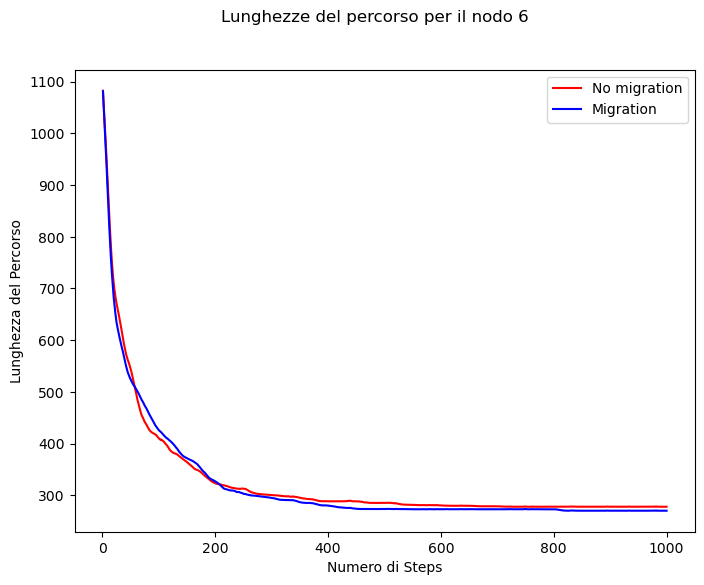

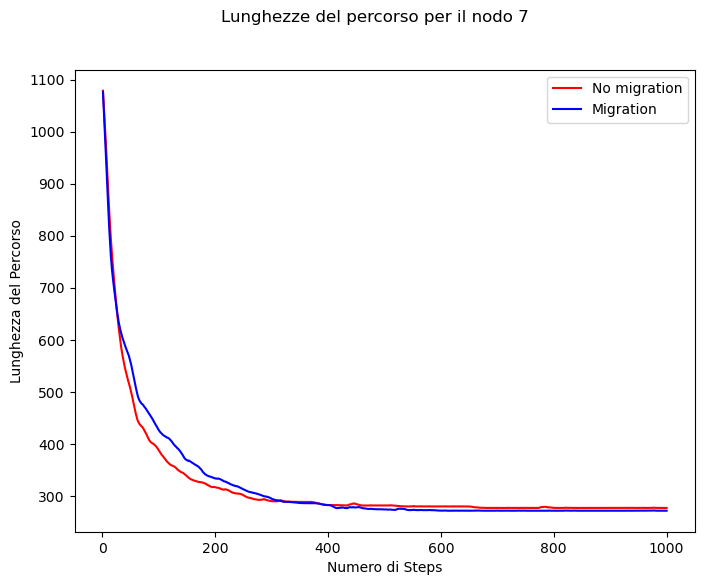

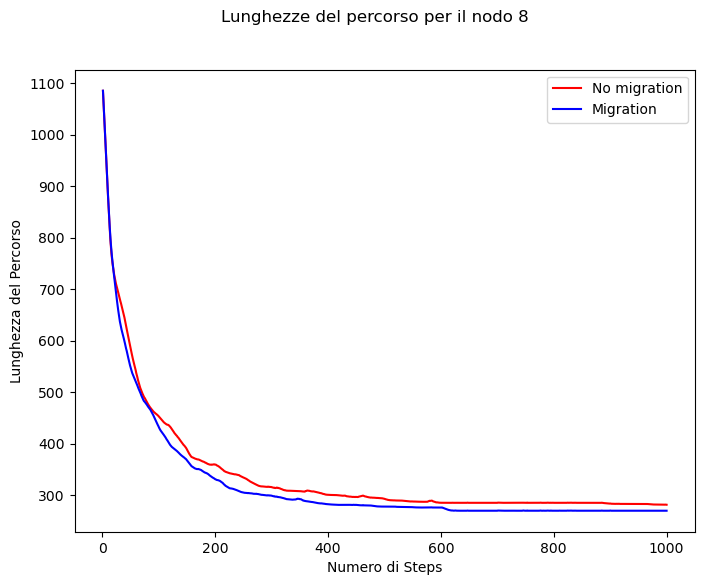

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Iterazione su tutti i nodi
for node in range(8):
    # Creazione della figura per il nodo corrente
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.suptitle(f"Lunghezze del percorso per il nodo {node+1}")

    # File con i dati delle lunghezze dei percorsi del nodo corrente
    lengths_file_nomigr = f"./bestlength_{node}.data"
    lengths_file_migr = f"./bestlengthmigration_{node}.data"

    # Dati delle lunghezze dei percorsi
    lengths_nomigr = np.loadtxt(lengths_file_nomigr)
    averages_nomigr = np.mean(lengths_nomigr, axis=1)

    lengths_migr = np.loadtxt(lengths_file_migr)
    averages_migr = np.mean(lengths_migr, axis=1)

    # Traccia delle lunghezze dei percorsi
    ax.plot(range(1, len(averages_nomigr) + 1), averages_nomigr, color='red', label='No migration')
    ax.plot(range(1, len(averages_migr) + 1), averages_migr, color='blue', label='Migration')

    # Impostazione delle etichette degli assi e della legenda
    ax.set_xlabel('Numero di Steps')
    ax.set_ylabel('Lunghezza del Percorso')
    ax.legend()

    # Mostra la figura per il nodo corrente
    plt.show()


Grazie a questi grafici possiamo notare una convergenza piu' rapida del metodo con le mutazioni, dovute a dei drop in concomitanza dello scambio tra i continenti.